<center>
<a href="http://www.udem.edu.co/"><img src="Escudo.png"></a>
<h1>Reconocimiento de Patrones I y II</h1>
<h2>Preprocesamiento de im√°genes digitales</h2>
<h3>2018-2</h3>
</center>

### Recordar...

Las principales t√©cnicas de procesamiento digital de im√°genes mejoran y realzan sus caracter√≠sticas.
Las operaciones que son llevadas a cabo por este tipo de t√©cnicas implican la alteraci√≥n del
histograma de la imagen o el procesamiento del valor de sus p√≠xeles.


## Negativo, brillo y contraste

A trav√©s del histograma de la imagen se pueden alterar ciertas caracter√≠sticas que √©sta posee. Las
m√°s comunes son el brillo y el contraste. Adem√°s de estas dos, la obtenci√≥n del negativo ha sido
ampliamente utilizada en fotograf√≠a (Figura 1.)

<img src="Fig_1.png">

### Brillo: 

Para modificar el brillo de una imagen se a√±ade una cierta cantidad al valor de
intensidad de cada uno de los p√≠xeles. Si esta cantidad es positiva se aumenta el brillo de la
imagen. Por el contrario, si es negativa, se disminuye. Si los valores obtenidos sobrepasan los
extremos del intervalo de posibles niveles de intensidad, se establecen el m√°ximo y el m√≠nimo
de dicho intervalo como nuevos valores en cada caso. Cuando se aplica la operaci√≥n de brillo
sobre una imagen se produce un desplazamiento del histograma.

### Contraste: 

El contraste mide la diferencia de intensidades en los colores de una imagen. El
aumento o disminuci√≥n del contraste de una imagen se traduce como la compresi√≥n o
expansi√≥n del histograma respectivamente. Para ajustar el contraste de una imagen se han de
seleccionar dos valores de intensidad entre los cuales se ajustar√° el nuevo histograma, $C_{max}$ y
$C_{min}$ y aplicar las siguientes f√≥rmulas seg√∫n se desee disminuir o aumentar el contraste
respectivamente.

<img src="Ec_1.png">

Donde $I_{min}$ e $I_{max}$ representan los valores de intensidad m√≠nimo y m√°ximo de la imagen.

### Negativo:

El negativo de una imagen se obtiene restando el valor de cada p√≠xel al mayor valor
de intensidad posible $L-1$.

## Ejemplos y ejercicios

### Ejemplo 1

Aumentar el brillo de la imagen de prueba en 50.

### Ejercicio 1

Disminuir el brillo de la imagen de prueba en 70. Graficar el histograma de la imagen original y despu√©s de haber disminuido el brillo y analizar el efecto que tiene esta operaci√≥n sobre el histograma de la imagen.

### Ejercicio 2

- Construir un m√©todo para aumentar o disminuir el contraste de una imagen.
- Aplicar un aumento de contraste a la imagen de prueba.
- Graficar el histograma de la imagen original y el de la imagen con el contraste aumentado y analizar el efecto de dicha operaci√≥n sobre el histograma.


### Ejercicio 3

Obtener el negativo de la imagen de prueba.

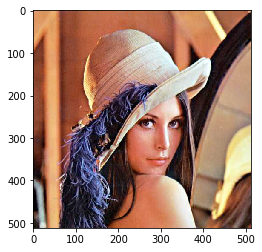

In [99]:
%matplotlib inline
from PIL import Image             #Estamos usando la librer√≠a Pillow con PIL
import numpy as np                # funciones num√©ricas (arrays, matrices, etc.)
import matplotlib.pyplot as plt   # funciones para representaci√≥n gr√°fica

I = Image.open("img/img1.jpg")
#Para visualizar la imagen en el notebook
plt.imshow(np.asarray(I))
plt.show()

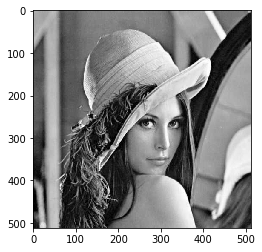

(512, 512) L None


In [100]:
I_gris = I.convert('L')
#I_gris.show()
plt.imshow(np.asarray(I_gris), cmap='gray')
plt.show()
print (I_gris.size, I_gris.mode, I_gris.format)

In [101]:
Img = np.asarray(I_gris,dtype=np.float32)   #convierte el objeto I1 en una matriz de tipo float32.

### Aumentando el brillo de la imagen en 50

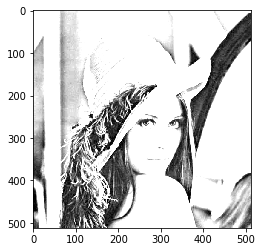

In [102]:
#Ya las imagenes las tenemos en escala de grises

b = 150
filas = np.size(Img,0)
columnas = np.size(Img,1)
new_Img = np.zeros((filas,columnas))

for i in range(0,filas):
    for j in range(0, columnas):
        new_x = Img[i,j]+b
        if new_x > 255:
            new_x = 255
        new_Img[i,j] = new_x

Img2 = Image.fromarray(new_Img.astype(np.uint8))
plt.imshow(new_Img,cmap='gray')

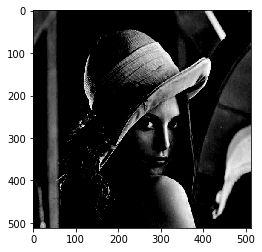

In [103]:
#Ya las imagenes las tenemos en escala de grises

b = -150
filas = np.size(Img,0)
columnas = np.size(Img,1)
new_Img = np.zeros((filas,columnas))

for i in range(0,filas):
    for j in range(0, columnas):
        new_x = Img[i,j]+b
        if new_x < 0:
            new_x = 0
        new_Img[i,j] = new_x

Img2 = Image.fromarray(new_Img.astype(np.uint8))
plt.imshow(new_Img,cmap='gray')

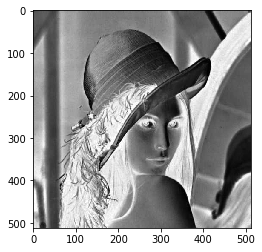

In [104]:
## Negativo
b = 255
filas = np.size(Img,0)
columnas = np.size(Img,1)
new_Img = np.zeros((filas,columnas))

for i in range(0,filas):
    for j in range(0, columnas):
        new_Img[i,j] = b - Img[i,j]

Img2 = Image.fromarray(new_Img.astype(np.uint8))
plt.imshow(new_Img,cmap='gray')

(-0.5, 511.5, 511.5, -0.5)

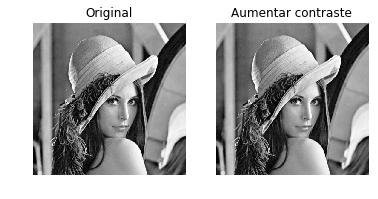

In [105]:
def Disminuir_contraste(Cmax,Cmin,image):
    Imax = np.amax(np.array(image))
    Imin = np.amin(np.array(image))
    filas = np.size(Img,0)
    columnas = np.size(Img,1)
    new_Img = np.zeros((filas,columnas))

    for i in range(0,filas):
        for j in range(0, columnas):
            new_Img[i,j] = ((Cmax-Cmin)/(Imax - Imin))*(image[i,j]-Imin)+Cmin  
    return new_Img

def Aumentar_contraste(Cmax,Cmin,image):
    Imax = np.amax(np.array(image))
    Imin = np.amin(np.array(image))
    filas = np.size(Img,0)
    columnas = np.size(Img,1)
    new_Img = np.zeros((filas,columnas))

    for i in range(0,filas):
        for j in range(0, columnas):
            new_Img[i,j] = ((image[i,j] - Imin)/(Imax - Imin))*(Cmax-Cmin)+Cmin           
    return new_Img


plt.subplot(121)
plt.imshow(Img,cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(122)
plt.imshow(Aumentar_contraste(254,100,Img),cmap='gray')
plt.title('Aumentar contraste')
plt.axis('off')

#plt.subplot(122)
#plt.imshow(Disminuir_contraste(254,10,Img),cmap='gray')
#plt.title('Disminuir contraste')
#plt.axis('off')

#### Comparando los histogramas

In [106]:
#Genera el historama de la imagen
hist,bins = np.histogram(Img.flatten(),256,[0,256])
hist2,bins2 = np.histogram(new_Img.flatten(),256,[0,256])

#Consultar c√≥mo graficar el histograma de las im√°genes y hacer el an√°lisis.

### Resuelva los ejercicios 1 y 2

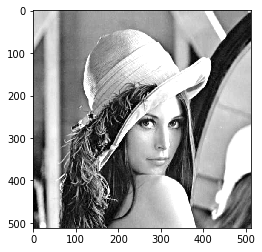

In [107]:
b = 50
filas = np.size(Img,0)
columnas = np.size(Img,1)
new_Img = np.zeros((filas,columnas))

for i in range(0,filas):
    for j in range(0, columnas):
        new_x = Img[i,j]+50
        if new_x > 255:
            new_x = 255
        new_Img[i,j] = new_x

Img2 = Image.fromarray(new_Img.astype(np.uint8))
plt.imshow(new_Img,cmap='gray') 


## Ecualizaci√≥n del histograma

La ecualizaci√≥n del histograma de una imagen pretende obtener una distribuci√≥n uniforme de los
p√≠xeles, es decir, que cada nivel de gris tenga la misma probabilidad de aparecer en la imagen. Este m√©todo es muy utilizado para mejorar el contraste de las im√°genes (Figura 2). En ella se puede ver una distribuci√≥n m√°s uniforme de los niveles de intensidad en el nuevo histograma adem√°s de una mejora en la apreciaci√≥n de los detalles. Para obtener la ecualizaci√≥n de una imagen se siguen los siguientes pasos:

<img src="Fig_2.png">



1. Se obtiene el histograma normalizado de la imagen, $H$, y se multiplican todas las frecuencias
por el m√°ximo valor de intensidad $L-1$.

2. Se calcula el histograma de frecuencias acumuladas, $H'$. En este caso, cada posici√≥n contiene
la suma de todos los valores hasta dicha posici√≥n incluyendo el de ella misma. Posteriormente
se redondean los resultados al entero m√°s pr√≥ximo.

3. El valor de cada nuevo p√≠xel $ùêº'_{ij}$ es reemplazado por el valor de $H'$ en la posici√≥n indicada por
el valor de intensidad del p√≠xel original $I_{ij}$, es decir, $ùêº‚Ä≤_{ij}=H'(ùêº_{ij})$.

Recordar...

Si cada frecuencia es dividida entre el n√∫mero total de p√≠xeles de la imagen se obtiene el histograma
normalizado. En ese caso cada valor obtenido representa la probabilidad de obtener un p√≠xel con el
valor de intensidad al que est√° asociada la frecuencia, (Freeman, 2005).

## Ejercicio

Imprimir la imagen de prueba despu√©s de realizar la ecualizaci√≥n de su histograma.

(-0.5, 511.5, 511.5, -0.5)

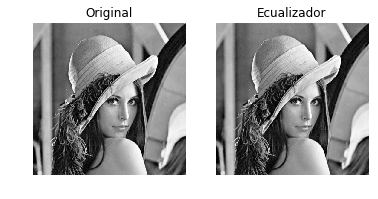

In [114]:
#Genera el histograma de la Imagen
#Paso 1:
dimImg = filas*columnas
#print(dimImg)
hist,bins = np.histogram(Img.flatten(),256,[0,256])
#print(np.max(hist))
hist_norm = (hist/dimImg)*255
#print(np.max(hist_norm))
#print(hist)
#print(hist_norm)

#Paso2:
#Genera la funci√≥n de distribuci√≥n acumulada (cdf por sus siglas en ingl√©s)
cdf = hist_norm.cumsum()
cdf1 = np.round(cdf)

#Paso 3:
filas = np.size(Img,0)
columnas = np.size(Img,1)
new_Img = np.zeros((filas,columnas))

for i in range(0,filas):
    for j in range(0, columnas):
        intensidad = Img[i,j]
        new_Img[i,j] = cdf1[int(intensidad)]

plt.subplot(121)
plt.imshow(Img,cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(122)
plt.imshow(Aumentar_contraste(254,100,Img),cmap='gray')
plt.title('Ecualizador')
plt.axis('off')
